In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Name of the CSV file
file = 'yelp_academic_dataset_user.json'
df = pd.read_json(file, lines = True)
df['name'] = df['name'].str.lower()

# Name of the CSV file
gender = 'gender names.csv'
gender = pd.read_csv(gender)

# Rename columns for readability
gender = gender.rename(columns={"first_name": "name"})


In [4]:
merge_table = pd.merge(df, gender, on="name", how="left")

In [72]:
# merge_table.to_csv(r'C:\Users\mrabier\Dropbox\Data API projects\Census block output\merge_table.csv')

In [5]:
merge_table.head()

,yelping_since,votes,review_count,name,user_id,friends,fans,average_stars,type,compliments,elite,nameprimary,gender,count
0,2004-10,"{'funny': 166, 'useful': 278, 'cool': 245}",108,russel,18kPq7GPye-YQ3LyKyAZPw,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",69,4.14,user,"{'profile': 8, 'cute': 15, 'funny': 11, 'plain...","[2005, 2006]",RUSSEL,Male,1.0
1,2004-10,"{'funny': 6849, 'useful': 12642, 'cool': 9837}",1233,jeremy,rpOyqD_893cqmDAtJLbdog,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",1012,3.64,user,"{'profile': 110, 'cute': 209, 'funny': 561, 'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",JEREMY,Male,1.0
2,2004-10,"{'funny': 907, 'useful': 1445, 'cool': 727}",442,michael,4U9kSBLuBDU391x6bxU-YA,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",93,3.59,user,"{'profile': 9, 'cute': 23, 'funny': 122, 'plai...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",MICHAEL,Male,1.0
3,2004-10,"{'funny': 1, 'useful': 11, 'cool': 5}",11,ken,fHtTaujcyKvXglE33Z5yIw,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",2,4.64,user,{'cute': 2},[],KEN,Male,1.0
4,2004-10,"{'funny': 10, 'useful': 34, 'cool': 11}",66,katherine,SIBCL7HBkrP4llolm4SC2A,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",3,3.80,user,"{'cute': 2, 'plain': 2, 'writer': 2, 'note': 1...",[2005],KATHERINE,Female,1.0


In [95]:
# funny = [i["funny"] for i in merge_table["votes"]]

In [6]:
funny = []
useful = []
cool = []

length = len(merge_table["votes"])

for i in range(0,length):
    fvotes = merge_table["votes"][i]["funny"]
    funny.append(fvotes)
    uvotes = merge_table["votes"][i]["useful"]
    useful.append(uvotes)
    cvotes = merge_table["votes"][i]["cool"]
    cool.append(cvotes)

In [7]:
# create dataframe 

gender_dict = {
    "gender": merge_table["gender"],
    "review counts": merge_table["review_count"],
    "fans": merge_table["fans"],
    "average stars": merge_table["average_stars"],
    "user_id": merge_table["user_id"],
    "funny votes": funny,
    "useful votes": useful,
    "cool votes": cool
}

gender_data = pd.DataFrame(gender_dict)
gender_data.head()

gender_data = gender_data[(gender_data["gender"] == "Male")|(gender_data["gender"] == "Female")]
gender_data
gender_data = gender_data[(gender_data["review counts"] > 0)]


In [8]:
#scale fans by the number of reviews:
gender_data["fans_scaled"] = gender_data["fans"]/gender_data["review counts"]
gender_data["fans_scaled"]

0         0.638889
1         0.820762
2         0.210407
3         0.181818
4         0.045455
            ...   
366709    0.200000
366710    0.000000
366712    0.000000
366713    0.000000
366714    0.000000
Name: fans_scaled, Length: 297429, dtype: float64

In [9]:
#scale funny by the number of reviews:
gender_data["funny_scaled"] = gender_data["funny votes"]/gender_data["review counts"]

In [10]:
#scale funny by the number of reviews:
gender_data["useful_scaled"] = gender_data["useful votes"]/gender_data["review counts"]

In [11]:
#scale funny by the number of reviews:
gender_data["cool_scaled"] = gender_data["cool votes"]/gender_data["review counts"]
type(gender_data["cool votes"])

pandas.core.series.Series

In [12]:
gender_data.describe()

,review counts,fans,average stars,funny votes,useful votes,cool votes,fans_scaled,funny_scaled,useful_scaled,cool_scaled
count,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000,297429.000000
mean,32.589183,1.629818,3.736903,30.614469,60.586103,34.508972,0.035268,0.340860,1.094153,0.354769
std,96.669501,11.951882,1.027204,310.513783,417.313395,345.549774,0.262037,1.016050,1.893806,0.908951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.310000,0.000000,1.000000,0.000000,0.000000,0.000000,0.312500,0.000000
50%,6.000000,0.000000,3.880000,1.000000,5.000000,1.000000,0.000000,0.117647,0.800000,0.153846
75%,21.000000,1.000000,4.470000,6.000000,22.000000,6.000000,0.012174,0.400000,1.432432,0.428571
max,8843.000000,1298.000000,5.000000,32747.000000,36474.000000,32517.000000,36.500000,232.000000,459.000000,151.500000


In [13]:
grouped_by_gender = gender_data.groupby(['gender'])
grouped_by_gender.head()

,gender,review counts,fans,average stars,user_id,funny votes,useful votes,cool votes,fans_scaled,funny_scaled,useful_scaled,cool_scaled
0,Male,108,69,4.14,18kPq7GPye-YQ3LyKyAZPw,166,278,245,0.638889,1.537037,2.574074,2.268519
1,Male,1233,1012,3.64,rpOyqD_893cqmDAtJLbdog,6849,12642,9837,0.820762,5.554745,10.253041,7.978102
2,Male,442,93,3.59,4U9kSBLuBDU391x6bxU-YA,907,1445,727,0.210407,2.052036,3.269231,1.644796
3,Male,11,2,4.64,fHtTaujcyKvXglE33Z5yIw,1,11,5,0.181818,0.090909,1.000000,0.454545
4,Female,66,3,3.80,SIBCL7HBkrP4llolm4SC2A,10,34,11,0.045455,0.151515,0.515152,0.166667
5,Female,1589,777,4.35,8J4IIYcqBlFch8T90N923A,12453,16940,16174,0.488987,7.837004,10.660793,10.178729
6,Male,170,7,3.52,wy6l_zUo7SN0qrvNRWgySw,35,86,43,0.041176,0.205882,0.505882,0.252941
8,Female,59,2,3.86,WPOKvkacSKHx_bIG1alFiA,25,118,30,0.033898,0.423729,2.000000,0.508475
11,Female,979,73,4.02,ZWOj6LmzwGvMDh-A85EOtA,1105,2381,1914,0.074566,1.128703,2.432074,1.955056
14,Female,129,11,4.00,LdS4fnqUebNW-MYd1-noKA,331,521,424,0.085271,2.565891,4.038760,3.286822


In [14]:
funny_votes_gender = grouped_by_gender["funny_scaled"].mean()
useful_votes_gender = grouped_by_gender["useful_scaled"].mean()
cool_votes_gender = grouped_by_gender["cool_scaled"].mean()

fans_gender = grouped_by_gender["fans_scaled"].mean()
stars_gender = grouped_by_gender["average stars"].mean()

total_reviews_gender = grouped_by_gender["review counts"].mean()

In [15]:
gender_dict = {
    "review counts": total_reviews_gender,
    "fans": fans_gender,
    "average stars": stars_gender,
    "funny votes": funny_votes_gender,
    "useful votes": useful_votes_gender,
    "cool votes": cool_votes_gender
}

grouped_gender_data = pd.DataFrame(gender_dict)
grouped_gender_data.head()

,review counts,fans,average stars,funny votes,useful votes,cool votes
gender,,,,,,
Female,34.630094,0.037245,3.770766,0.328994,1.121550,0.368004
Male,30.454563,0.033200,3.701486,0.353272,1.065497,0.340927


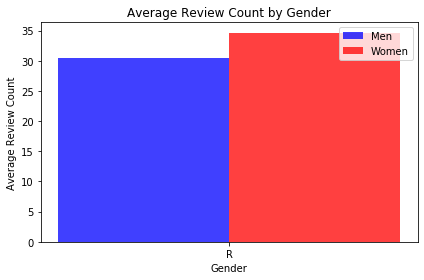

<Figure size 432x288 with 0 Axes>

In [48]:
n_groups = 1

means_women = grouped_gender_data.iloc[0,0]
means_men = grouped_gender_data.iloc[1,0]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.75
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                label='Women')

plt.xlabel('Gender')
plt.ylabel('Average Review Count')
plt.title('Average Review Count by Gender')
plt.xticks(index + bar_width / 2, ('Review Counts'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("Average Review Count.png")

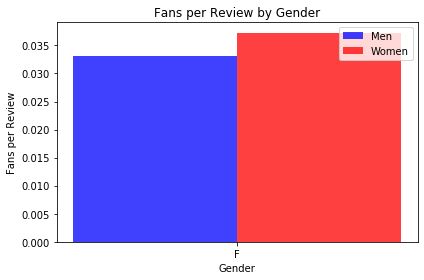

<Figure size 432x288 with 0 Axes>

In [49]:
n_groups = 1

means_women = grouped_gender_data.iloc[0,1]
means_men = grouped_gender_data.iloc[1,1]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = .75
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                label='Women')

plt.xlabel('Gender')
plt.ylabel('Fans per Review')
plt.title('Fans per Review by Gender')
plt.xticks(index + bar_width / 2, ('Fans Per Review'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("Fans Per Review.png")

In [52]:
n_groups = 3

means_women = grouped_gender_data.iloc[0,3:6]
means_men = grouped_gender_data.iloc[1,3:6]

means_men

funny votes     0.353272
useful votes    1.065497
cool votes      0.340927
Name: Male, dtype: float64

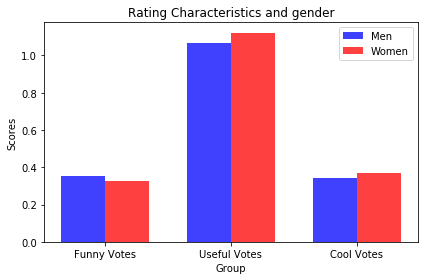

<Figure size 432x288 with 0 Axes>

In [53]:
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = .75

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Rating Characteristics and gender')
plt.xticks(index + bar_width / 2, ('Funny Votes', 'Useful Votes', 'Cool Votes'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("Characteristics and Gender.png")

In [35]:
# start doing statistical analyses
# fans per gender
fans_female = gender_data.loc[gender_data["gender"]=='Female', ["fans"]]
fans_male = gender_data.loc[gender_data["gender"]=='Male', ["fans"]]
stats.ttest_ind(fans_female, fans_male, equal_var=False)

Ttest_indResult(statistic=array([16.81982361]), pvalue=array([1.88374469e-63]))

In [161]:
# start doing statistical analyses
# fans per gender
fans_female_scaled = gender_data.loc[gender_data["gender"]=='Female', ["fans_scaled"]]
fans_male_scaled = gender_data.loc[gender_data["gender"]=='Male', ["fans_scaled"]]
stats.ttest_ind(fans_female_scaled, fans_male_scaled, nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=array([4.21982336]), pvalue=array([2.44566505e-05]))

In [162]:
reviews_female = gender_data.loc[gender_data["gender"]=='Female', ["review counts"]]
reviews_male = gender_data.loc[gender_data["gender"]=='Male', ["review counts"]]
stats.ttest_ind(reviews_female, reviews_male, equal_var=False)

Ttest_indResult(statistic=array([11.79225929]), pvalue=array([4.35017025e-32]))

In [163]:
stars_female = gender_data.loc[gender_data["gender"]=='Female', ["average stars"]]
stars_male = gender_data.loc[gender_data["gender"]=='Male', ["average stars"]]
stats.ttest_ind(stars_female, stars_male, equal_var=False)

Ttest_indResult(statistic=array([18.39251846]), pvalue=array([1.6616759e-75]))

In [164]:
funny_female = gender_data.loc[gender_data["gender"]=='Female', ["funny votes"]]
funny_male = gender_data.loc[gender_data["gender"]=='Male', ["funny votes"]]
stats.ttest_ind(funny_female, funny_male, equal_var=False)

Ttest_indResult(statistic=array([3.46055334]), pvalue=array([0.00053914]))

In [165]:
funny_female_scaled = gender_data.loc[gender_data["gender"]=='Female', ["funny_scaled"]]
funny_male_scaled = gender_data.loc[gender_data["gender"]=='Male', ["funny_scaled"]]
stats.ttest_ind(funny_female_scaled, funny_male_scaled,  nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=array([-6.45574382]), pvalue=array([1.07886199e-10]))

In [166]:
useful_female = gender_data.loc[gender_data["gender"]=='Female', ["useful votes"]]
useful_male = gender_data.loc[gender_data["gender"]=='Male', ["useful votes"]]
stats.ttest_ind(useful_female, useful_male, equal_var=False)

Ttest_indResult(statistic=array([8.90297208]), pvalue=array([5.46659285e-19]))

In [167]:
useful_female_scaled = gender_data.loc[gender_data["gender"]=='Female', ["useful_scaled"]]
useful_male_scaled = gender_data.loc[gender_data["gender"]=='Male', ["useful_scaled"]]
stats.ttest_ind(useful_female_scaled, useful_male_scaled, nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=array([7.99995174]), pvalue=array([1.24992132e-15]))

In [168]:
cool_female = gender_data.loc[gender_data["gender"]=='Female', ["cool votes"]]
cool_male = gender_data.loc[gender_data["gender"]=='Male', ["cool votes"]]
stats.ttest_ind(cool_female, cool_male, equal_var=False)

Ttest_indResult(statistic=array([6.69352598]), pvalue=array([2.18240662e-11]))

In [169]:
cool_female_scaled = gender_data.loc[gender_data["gender"]=='Female', ["cool_scaled"]]
cool_male_scaled = gender_data.loc[gender_data["gender"]=='Male', ["cool_scaled"]]
stats.ttest_ind(cool_female, cool_male, nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=array([6.69352598]), pvalue=array([2.18240662e-11]))